### <font color='red'>NOTE: Please do not edit this file. </font> Go to <font color='blue'>*File > Save a copy in Drive*</font>.

# **openHPI Course: Knowledge Graphs 2023**
## **Week 2: Basic Knowledge Graph Infrastructure**
### **Notebook 2.2: RDFLib**
---

This is the python notebook for week 2 (Basic Knowledge Graph Infrastructure) in the openHPI Course **Knowledge Graphs 2023**.

In this colab notebook you will learn how to make use of the RDFlib library in python and how to create and manipulate RDF graphs with python.

*Please make a copy of this notebook to try out your own adaptions via "File -> Save Copy in Drive"*

## RDFlib

**[RDFlib](https://github.com/RDFLib/rdflib)** is is a Python package for working with RDF. It contains:
- parsers and serializers for RDF/XML, N3, NTriples, N-Quads, Turtle, TriX, Trig and JSON-LD
- a graph interface which can be backed by any one of a number of store implementations
- store implementations for in-memory, persistent on disk (Berkeley DB) and remote SPARQL endpoints
- a SPARQL 1.1 implementation - supporting SPARQL 1.1 Queries and Update statements
- SPARQL function extension mechanisms


We have to install the following packages:


*   **RDFlib** for working with RDF
*   **PyDotPlus** for visualization



In [ ]:
%%capture
!pip3 install rdflib pydotplus

In [ ]:
#import rdflib
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import DC, RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces
#for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [ ]:
# helper function for visualizing RDF graphs
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

First, let's **create an RDF graph** about favourite movies of all times. The example is given in RDF Turtle serialization.

In [ ]:
g = Graph()
# create graph using turtle
turtledata = """\
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

dbr:John_Travolta 		rdf:type   				dbo:Actor ;
      			  				dbo:awards 				dbr:67th_Academy_Awards ;
      			  				ex:portrays				dbr:Vincent_Vega .
dbr:Pulp_Fiction  		rdf:type  				dbo:Film ;
											rdfs:label				"Pulp_Fiction"@en ,
											"Криминальное чтиво"@ru ;
      			  				dbo:genre     			dbr:Neo_noir ;
      			  				ex:playsIn 				dbr:Los_Angeles ;
      			  				ex:fictionalCharacter 	dbr:Vincent_Vega ;
      			  				dbo:starring  			dbr:John_Travolta ,
      			  				dbr:Uma_Thurman ,
      			  				dbr:Bruce_Willis .
dbr:Vincent_Vega 	  	rdf:type 				dbo:Fictional_character .
dbr:Quentin_Tarantino rdf:type 				dbo:Director .
dbr:Uma_Thurman				rdf:type 				dbo:Actor ;
											ex:portrays				dbr:Mia_Wallace ;
											dbo:awards  			dbr:67th_Academy_Awards .
dbr:Bruce_Willis			rdf:type   				dbo:Actor .
dbr:The_Green_Mile		rdf:type  				dbo:Film ;
											rdfs:label				"The Green Mile"@en ,
											"Зелёная ми́ля"@ru ;
											dbo:starring			dbr:Tom_Hanks,
											dbr:David_Morse .
dbr:Tom_Hanks					rdf:type 				dbo:Actor .
dbr:David_Morse				rdf:type 				dbo:Actor .
dbr:Tenet							rdf:type  				dbo:Film ;
											rdfs:label				"Tenet"@en ;
											dbo:starring 			dbr:Robert_Pattinson ,
											dbr:Elizabeth_Debicki ,
											dbr:John_David_Washington .
dbr:Robert_Pattinson 	rdf:type 				dbo:Actor .
dbr:Elizabeth_Debicki rdf:type 				dbo:Actor .
dbr:John_David_Washington rdf:type 				dbo:Actor ."""

g.parse(data=turtledata, format="turtle")

<Graph identifier=N39fd0faf5d73417eb26b863fab8a26b6 (<class 'rdflib.graph.Graph'>)>

### Manipulating the Graph

We can look up information for a given URI. For example, let's print all the information about Bruce Willis.

In [ ]:

bruce = URIRef('http://dbpedia.org/resource/Bruce_Willis')
# Print all predicate and objects of triples that have robert as subject
print([o for o in g.predicate_objects(subject=bruce)])
print([o for o in g.subject_predicates(object=bruce)])

[(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Actor'))]
[(rdflib.term.URIRef('http://dbpedia.org/resource/Pulp_Fiction'), rdflib.term.URIRef('http://dbpedia.org/ontology/starring'))]


Let's create a graph and add some information into it.



In [ ]:
n = Namespace("http://example.org/") # introducing example namespace
dbo = Namespace("http://dbpedia.org/ontology/")
dbr = Namespace("http://dbpedia.org/resource/")


diehard = URIRef('http://example.org/DieHard')

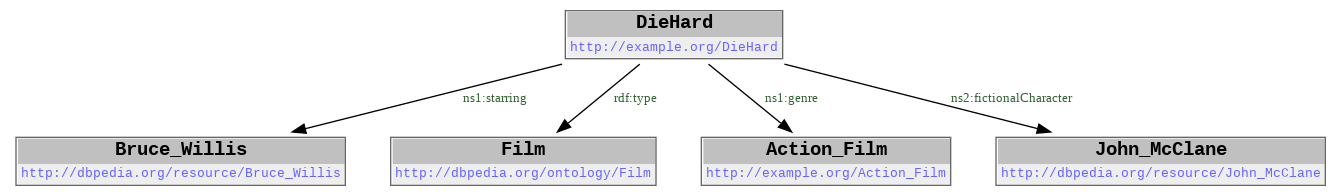

In [ ]:
#introducing a new graph and populating it with triples
m = Graph()

m.add((diehard, RDF.type, dbo.Film))
m.add((diehard, dbo.starring, dbr.Bruce_Willis))
m.add((diehard, dbo.genre, n.Action_Film))
m.add((diehard, n.fictionalCharacter, dbr.John_McClane))
visualize(m)

#Problem: no connection between John McClane and Bruce Willis

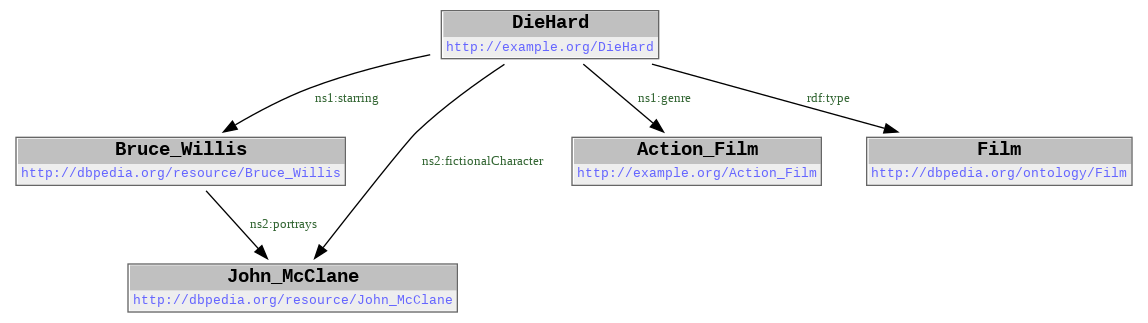

In [ ]:
#adding information to the graph
m.add((dbr.Bruce_Willis, n.portrays, dbr.John_McClane))
visualize(m)

Let's bring information from Graph g and Graph m together.

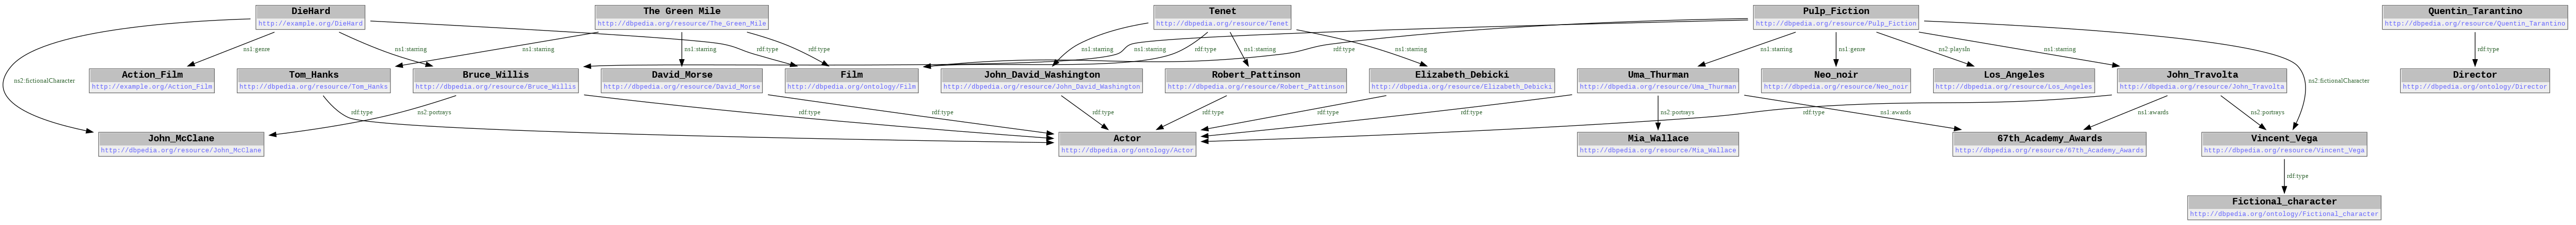

In [ ]:
#merging two graphs

mergedGraph= Graph()
mergedGraph=g+m
visualize (mergedGraph)

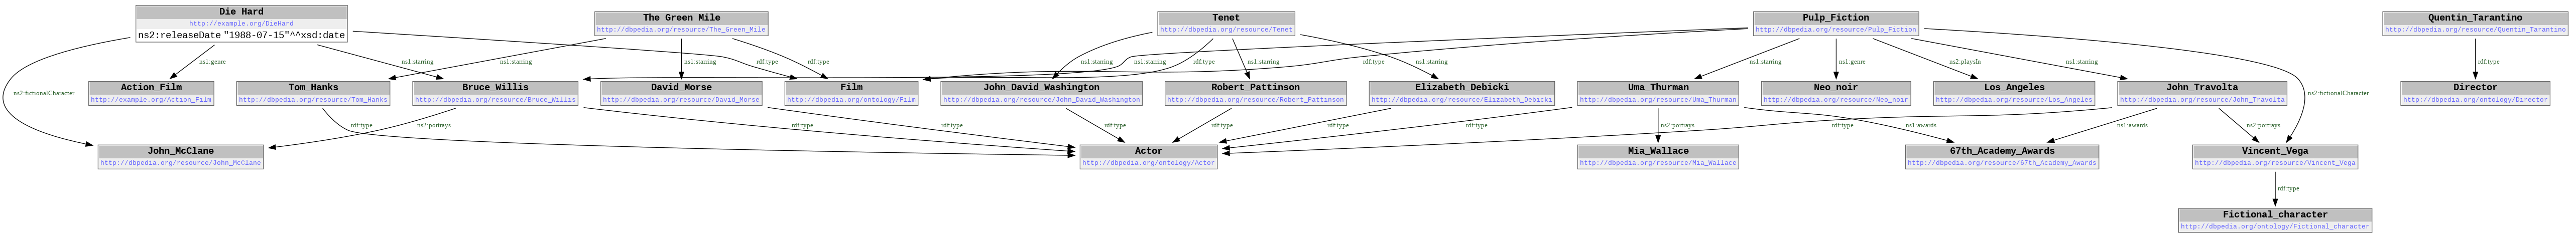

In [ ]:
#adding triples to a merged graph

title = Literal("Die Hard", lang="en") #passing a string
releasedate = Literal('1988-07-15',datatype=XSD.date) #passing a date

mergedGraph.add((diehard, RDFS.label, title))
mergedGraph.add((diehard, n.releaseDate, releasedate))

visualize(mergedGraph)

In [ ]:
#adding further labels to the film directly

mergedGraph.add((diehard, RDFS.label, Literal("Stirb langsam", lang="de")))
mergedGraph.add((diehard, RDFS.label, Literal("Міцний горішок", lang="ua")))

<Graph identifier=N2f6b729146f54c9fb0d6dab0e1aa7875 (<class 'rdflib.graph.Graph'>)>

In [ ]:
#adding a new release date
mergedGraph.add((diehard, n.releaseDate, Literal('1988-07-22',datatype=XSD.date)))

#print the release date of the "Die hard".
for date in mergedGraph.objects(predicate=n.releaseDate, subject=diehard):
  print (date)

1988-07-15
1988-07-22


In [ ]:
#only one value is possible, set() substitutes the previous information
mergedGraph.set((diehard, n.releaseDate, Literal('1988-07-22',datatype=XSD.date)))
for date in mergedGraph.objects(predicate=n.releaseDate, subject=diehard):
  print (date)

1988-07-22


In [ ]:
#change property :releaseDate into :releaseDateUSA
for subject, predicate, objects in mergedGraph.triples((None, n.releaseDate, None)):
    mergedGraph.set((subject, n.releaseDateUSA, objects))
    mergedGraph.remove((subject, n.releaseDate, objects))

In [ ]:
#print all infirmation about the film "Die Hard"
print([o for o in mergedGraph.predicate_objects(subject=diehard)])

[(rdflib.term.URIRef('http://dbpedia.org/ontology/starring'), rdflib.term.URIRef('http://dbpedia.org/resource/Bruce_Willis')), (rdflib.term.URIRef('http://example.org/fictionalCharacter'), rdflib.term.URIRef('http://dbpedia.org/resource/John_McClane')), (rdflib.term.URIRef('http://dbpedia.org/ontology/genre'), rdflib.term.URIRef('http://example.org/Action_Film')), (rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Film')), (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Die Hard', lang='en')), (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Stirb langsam', lang='de')), (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Міцний горішок', lang='ua')), (rdflib.term.URIRef('http://example.org/releaseDateUSA'), rdflib.term.Literal('1988-07-22', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dat

In [ ]:
#print movies and actors that are starring in the movies
for film in mergedGraph.subjects(RDF.type, dbo.Film):
  for actor in mergedGraph.objects(film, dbo.starring):
    print(actor, 'starring in', film)

http://dbpedia.org/resource/Bruce_Willis starring in http://dbpedia.org/resource/Pulp_Fiction
http://dbpedia.org/resource/Uma_Thurman starring in http://dbpedia.org/resource/Pulp_Fiction
http://dbpedia.org/resource/John_Travolta starring in http://dbpedia.org/resource/Pulp_Fiction
http://dbpedia.org/resource/Robert_Pattinson starring in http://dbpedia.org/resource/Tenet
http://dbpedia.org/resource/Elizabeth_Debicki starring in http://dbpedia.org/resource/Tenet
http://dbpedia.org/resource/John_David_Washington starring in http://dbpedia.org/resource/Tenet
http://dbpedia.org/resource/Tom_Hanks starring in http://dbpedia.org/resource/The_Green_Mile
http://dbpedia.org/resource/David_Morse starring in http://dbpedia.org/resource/The_Green_Mile
http://dbpedia.org/resource/Bruce_Willis starring in http://example.org/DieHard


In [ ]:
#remove all triples about the film "Die Hard" in the graph
mergedGraph.remove((diehard, None, None))
for s,p,o in mergedGraph:
  if s==diehard:
    print(s,p,o)

In [ ]:
#Save the graph
g.serialize(destination="filmgraph.ttl")

<Graph identifier=N39fd0faf5d73417eb26b863fab8a26b6 (<class 'rdflib.graph.Graph'>)>